#### Live presentation:
https://github.com/damianavila/RISE

#### Convert to html slides:
* https://medium.com/@mjspeck/presenting-code-using-jupyter-notebook-slides-a8a3c3b59d67
* jupyter nbconvert Jupyter\ Slides.ipynb --to slides --post serve

#### Syntax:
https://sourceforge.net/p/jupiter/wiki/markdown_syntax/

In [9]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd

figsize = (10,6)

# VPPlib (working title)
## Sascha Birk
## 08.11.2019

## Content

* About Me
* Backround of my work

+ Components of the VPPlib
    + Battery-electric vehicle
    + PVLib (External Component)
    + heat pump
    + thermal storage
    + Windpowerlib (External Component)
    + Pandapower (External Component)
    ---------------
+ VPPlib useage
+ distibution grid simulations
+ outlook

1. [Extraterrestrial radiation](#Extraterrestrial-radiation)
2. [Clear sky models](#Clear-sky-models)
2. [Diffuse ground](#Diffuse-ground)
2. [Diffuse sky](#Diffuse-sky)
    1. [Isotropic](#Isotropic-model)
    2. [Klucher](#Klucher-model)
    2. [Reindl](#Reindl-model)

# About Me

## My Background 
* Bachelor in Electrical Engineering, B.Eng. (DHBW Mannheim)
+ 2 years working experience at DB Energie GmbH
+ Master in Renewable Energies, M.Sc.
+ Research Associate at the Cologne University of Applied Sciences (TH Köln) for Prof. Schneiders

## My Subjects

* Since November 2017 coworker in the research project “VISE: Regionale Virtuelle Kraftwerke”
+ Technology research for regional virtual power plants
+ Modelling of technologies (generation, storage, usage)
+ Simulation and optimization of regional virtual power plants (collaboration with Forschungszentrum Jülich, Wuppertal Institut and ewi)

# Background: Sectorcoupling-Loadshapegenerator


* Developed during my masterthesis
* Generation of load profiles for battery-electric vehicles and heat pumps
+ use of pv-data from SMA provided by Prof. Waffenschmidt
+ use of electrical demand measured by rng
+ simple electrical storage

![house_model](./presentation/House.png)

# Background: VISE - Regional Virtual Powerplants

![model_graph](./presentation/Zusammenspiel_Teilmodelle.png)

# Components of the VPPlib

* environment class contains all time and weather dependent data

In [2]:
from model.VPPEnvironment import VPPEnvironment

#Values for environment
start = '2015-03-01 00:00:00'
end = '2015-03-01 23:45:00'
year = '2015'
time_freq = "15 min"
timebase = 15

environment = VPPEnvironment(start=start, end=end, timebase=timebase, year=year, time_freq=time_freq)

* user_profile class contains all user or building specific information

In [3]:
from model.VPPUserProfile import VPPUserProfile

#Values for user_profile
identifier = 'CIRE'

user_profile = VPPUserProfile(identifier=identifier)

# Battery-electric vehicle

In [4]:
from model.VPPBEV import VPPBEV

#Values for bev
unit="kW"
charging_power = 11 #kW
battery_max = 16 #kWh
battery_min = 0 #kWh
battery_usage = 1 #kW
charge_efficiency = 0.98
load_degradiation_begin = 0.8

#### Time to get our car...

In [5]:
bev = VPPBEV(unit=unit, identifier=(identifier+'_bev'),
             environment=environment, user_profile=user_profile,
             battery_max=battery_max, battery_min=battery_min, 
             battery_usage=battery_usage, 
             charging_power=charging_power, 
             load_degradiation_begin=load_degradiation_begin, 
             charge_efficiency=charge_efficiency)

#### create a load profile for our car

In [7]:
%%capture
bev.prepareTimeSeries()

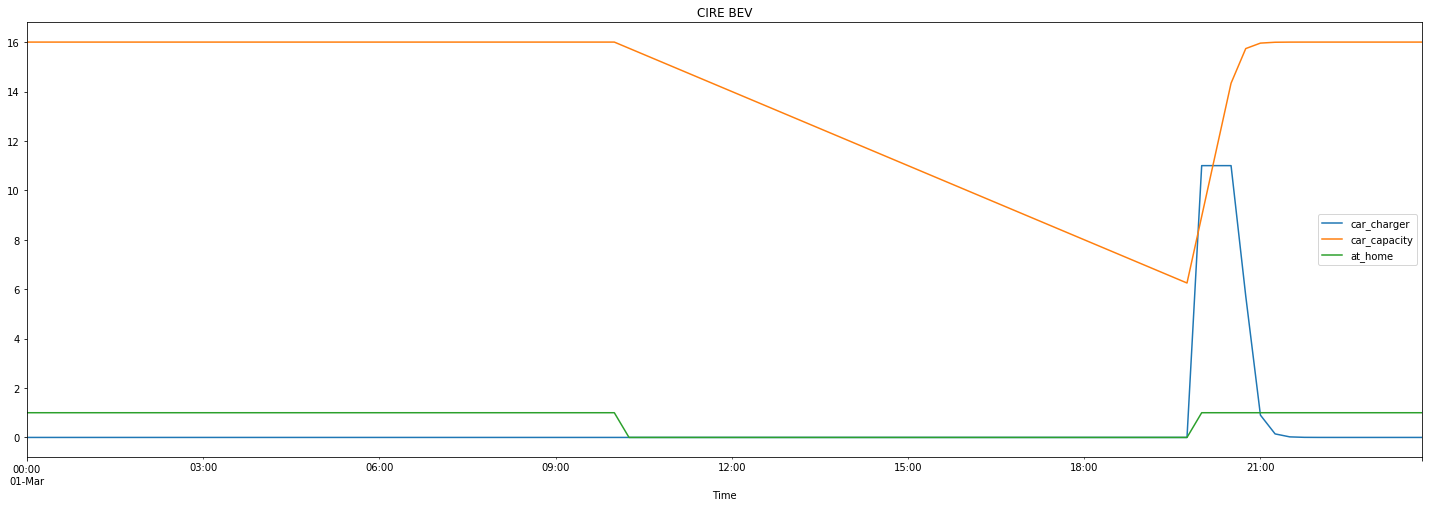

In [17]:
bev.timeseries.plot(figsize=(25, 8), title="CIRE BEV")

# PVlib

* Provides a set of functions and classes for simulating the performance of photovoltaic energy systems
+ Originally ported from the PVLIB MATLAB toolbox developed at Sandia National Laboratories
+ Contains data for pv modules and inverters

## PVlib - retrieve module data

In [18]:
import pvlib
from pvlib import pvsystem

sandia_modules = pvsystem.retrieve_sam(name='SandiaMod')
sandia_modules

,Advent_Solar_AS160___2006_,Advent_Solar_Ventura_210___2008_,Advent_Solar_Ventura_215___2009_,Aleo_S03_160__2007__E__,Aleo_S03_165__2007__E__,Aleo_S16_165__2007__E__,Aleo_S16_170__2007__E__,Aleo_S16_175__2007__E__,Aleo_S16_180__2007__E__,Aleo_S16_185__2007__E__,...,Panasonic_VBHN235SA06B__2013_,Trina_TSM_240PA05__2013_,Hanwha_HSL60P6_PA_4_250T__2013_,Suniva_OPT300_72_4_100__2013_,Canadian_Solar_CS6X_300M__2013_,LG_LG290N1C_G3__2013_,Sharp_NDQ235F4__2013_,Solar_Frontier_SF_160S__2013_,SolarWorld_Sunmodule_250_Poly__2013_,Silevo_Triex_U300_Black__2014_
Vintage,2006,2008,2009,2007 (E),2007 (E),2007 (E),2007 (E),2007 (E),2007 (E),2007 (E),...,2013,2013,2013,2013,2013,2013,2013,2013,2013,2014
Area,1.312,1.646,1.646,1.28,1.28,1.378,1.378,1.378,1.378,1.378,...,1.26,1.63,1.65,1.93,1.91,1.64,1.56,1.22,1.68,1.68
Material,mc-Si,mc-Si,mc-Si,c-Si,c-Si,mc-Si,mc-Si,mc-Si,mc-Si,mc-Si,...,a-Si / mono-Si,mc-Si,mc-Si,c-Si,c-Si,c-Si,mc-Si,CIS,mc-Si,c-Si
Cells_in_Series,72,60,60,72,72,50,50,50,50,50,...,72,60,60,72,72,60,60,172,60,96
Parallel_Strings,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Isco,5.564,8.34,8.49,5.1,5.2,7.9,7.95,8.1,8.15,8.2,...,5.8738,8.8449,8.5935,8.5753,8.6388,9.8525,8.6739,2.0259,8.3768,5.771
Voco,42.832,35.31,35.92,43.5,43.6,30,30.1,30.2,30.3,30.5,...,52.0042,36.8926,36.8075,44.2921,43.5918,39.6117,36.8276,112.505,36.3806,68.5983
Impo,5.028,7.49,7.74,4.55,4.65,7.08,7.23,7.38,7.53,7.67,...,5.5383,8.2955,8.0822,7.963,8.1359,9.2473,8.1243,1.8356,7.6921,5.383
Vmpo,32.41,27.61,27.92,35.6,35.8,23.3,23.5,23.7,23.9,24.1,...,43.1204,29.066,29.2011,35.0837,34.9531,31.2921,29.1988,86.6752,28.348,55.4547
Aisc,0.000537,0.00077,0.00082,0.0003,0.0003,0.0008,0.0008,0.0008,0.0008,0.0008,...,0.0005,0.0004,0.0004,0.0006,0.0005,0.0002,0.0006,0.0001,0.0006,0.0003


## PVlib - retrieve module data

In [19]:
inverters = pvsystem.retrieve_sam('sandiainverter')
inverters

,ABB__MICRO_0_25_I_OUTD_US_208_208V__CEC_2014_,ABB__MICRO_0_25_I_OUTD_US_208__208V__208V__CEC_2018_,ABB__MICRO_0_25_I_OUTD_US_240_240V__CEC_2014_,ABB__MICRO_0_25_I_OUTD_US_240__240V__240V__CEC_2018_,ABB__MICRO_0_3_I_OUTD_US_208_208V__CEC_2014_,ABB__MICRO_0_3_I_OUTD_US_208__208V__208V__CEC_2018_,ABB__MICRO_0_3_I_OUTD_US_240_240V__CEC_2014_,ABB__MICRO_0_3_I_OUTD_US_240__240V__240V__CEC_2018_,ABB__MICRO_0_3HV_I_OUTD_US_208_208V__CEC_2014_,ABB__MICRO_0_3HV_I_OUTD_US_208__208V__208V__CEC_2018_,...,i_Energy_Corporation__GT260_240V__CEC_2013_,i_Energy__GT260__240V__240V__CEC_2018_,iPower__SHO_1_1__120V__120V__CEC_2018_,iPower__SHO_2_0__240V__240V__CEC_2018_,iPower__SHO_2_5__240V__240V__CEC_2018_,iPower__SHO_3_0__240V__240V__CEC_2018_,iPower__SHO_3_5__240V__240V__CEC_2018_,iPower__SHO_4_6__208V__208V__CEC_2018_,iPower__SHO_4_8__240V__240V__CEC_2018_,iPower__SHO_5_2__240V__240V__CEC_2018_
Vac,208.000000,208.000000,240.000000,240.000000,208.000000,208.000000,240.000000,240.000000,208.000000,208.000000,...,240.000000,240.000000,120.000000,240.000000,240.000000,240.000000,240.000000,208.000000,240.000000,240.000000
Paco,250.000000,250.000000,250.000000,250.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,230.000000,230.000000,1100.000000,2000.000000,2500.000000,3000.000000,3500.000000,4600.000000,4800.000000,5200.000000
Pdco,259.522050,259.589000,259.552697,259.492000,311.714554,311.669000,311.504961,311.581000,312.523347,312.423000,...,245.790658,245.630000,1194.090000,2161.880000,2632.840000,3205.930000,3641.830000,4797.810000,4968.030000,5382.860000
Vdco,40.242603,40.000000,39.982246,40.000000,40.227111,40.000000,40.136095,40.000000,45.259429,45.000000,...,40.709524,40.000000,182.000000,199.000000,218.000000,222.500000,263.000000,254.000000,263.000000,280.000000
Pso,1.771614,2.089610,1.931194,2.240410,1.971053,1.846510,1.991342,1.950540,1.882620,1.762100,...,2.511675,2.530100,22.095400,24.465800,42.776500,31.682000,64.768100,54.570100,85.145700,62.486700
C0,-0.000025,-0.000041,-0.000027,-0.000039,-0.000036,-0.000033,-0.000031,-0.000034,-0.000049,-0.000045,...,0.000048,0.000062,-0.000021,-0.000013,-0.000014,-0.000008,-0.000009,-0.000006,-0.000006,-0.000005
C1,-0.000090,-0.000091,-0.000158,-0.000132,-0.000256,-0.000192,-0.000289,-0.000256,-0.000241,-0.000198,...,-0.000086,-0.000098,0.000057,0.000055,0.000061,0.000036,0.000035,0.000028,0.000034,0.000044
C2,0.000669,0.000494,0.001480,0.002418,-0.000833,0.000907,-0.002110,0.002453,0.000975,0.002208,...,-0.002590,0.000231,0.002001,0.001703,0.002053,0.001708,0.001417,0.001381,0.000586,0.001260
C3,-0.018900,-0.013171,-0.034600,-0.014926,-0.039100,-0.031742,-0.049500,-0.028223,-0.027600,-0.023681,...,0.157676,0.121032,0.000623,0.000315,0.001530,0.000860,0.001218,0.000889,0.000195,0.000367
Pnt,0.020000,0.020000,0.050000,0.050000,0.020000,0.020000,0.050000,0.050000,0.060000,0.060000,...,0.150000,0.150000,3.600000,3.600000,3.900000,3.630000,3.860000,4.000000,4.100000,4.000000


In [21]:
inverters.loc['Pdco'] > 500.

ABB__MICRO_0_25_I_OUTD_US_208_208V__CEC_2014_           False
ABB__MICRO_0_25_I_OUTD_US_208__208V__208V__CEC_2018_    False
ABB__MICRO_0_25_I_OUTD_US_240_240V__CEC_2014_           False
ABB__MICRO_0_25_I_OUTD_US_240__240V__240V__CEC_2018_    False
ABB__MICRO_0_3_I_OUTD_US_208_208V__CEC_2014_            False
                                                        ...  
iPower__SHO_3_0__240V__240V__CEC_2018_                   True
iPower__SHO_3_5__240V__240V__CEC_2018_                   True
iPower__SHO_4_6__208V__208V__CEC_2018_                   True
iPower__SHO_4_8__240V__240V__CEC_2018_                   True
iPower__SHO_5_2__240V__240V__CEC_2018_                   True
Name: Pdco, Length: 5100, dtype: bool

# PVlib inside VPPlib

In [22]:
from model.VPPPhotovoltaic import VPPPhotovoltaic

latitude = 50.941357
longitude = 6.958307

user_profile.latitude=latitude
user_profile.longitude=longitude

In [23]:
environment.get_pv_data(file="./input/pv/dwd_pv_data_2015.csv")

,dhi,ghi,dni
time,,,
2015-01-01 00:00:00,0.0,0.0,0.0
2015-01-01 00:15:00,0.0,0.0,0.0
2015-01-01 00:30:00,0.0,0.0,0.0
2015-01-01 00:45:00,0.0,0.0,0.0
2015-01-01 01:00:00,0.0,0.0,0.0
...,...,...,...
2015-12-31 22:45:00,0.0,0.0,0.0
2015-12-31 23:00:00,0.0,0.0,0.0
2015-12-31 23:15:00,0.0,0.0,0.0


## Define and get pv system

In [24]:
module_lib = 'SandiaMod'
module = 'Canadian_Solar_CS5P_220M___2009_'
inverter_lib = 'cecinverter'
inverter = 'ABB__PVI_4_2_OUTD_S_US_Z_M_A__208_V__208V__CEC_2014_'
surface_tilt = 20
surface_azimuth = 200
modules_per_string = 6
strings_per_inverter = 4

In [25]:
pv = VPPPhotovoltaic(unit=unit, identifier=(identifier+'_pv'), environment = environment, 
                     user_profile = user_profile,
                     module_lib=module_lib, 
                     module=module, 
                     inverter_lib=inverter_lib, 
                     inverter=inverter,
                     surface_tilt=surface_tilt, surface_azimuth=surface_azimuth,
                     modules_per_string=modules_per_string, strings_per_inverter=strings_per_inverter)

### Get and plot timeseries of pv

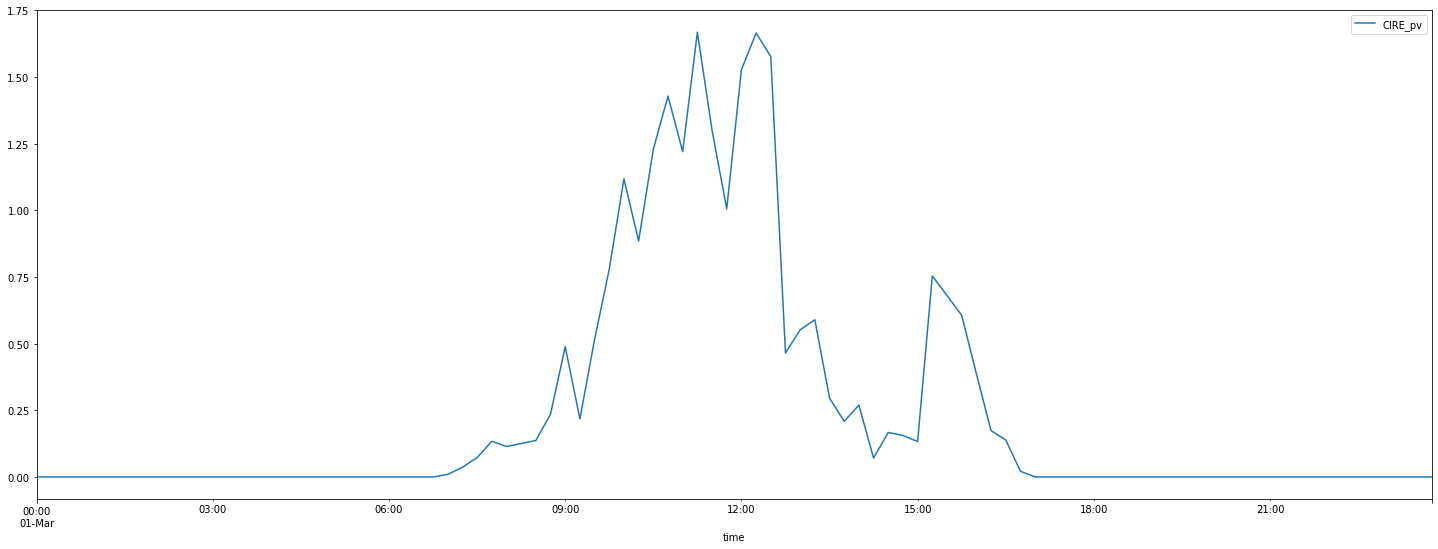

In [27]:
pv.prepareTimeSeries()

pv.timeseries.plot(figsize=(25,9))

* Additional features:
    + calculate incidence angle modifier
    + calculate module temperature dependent on irradiation, wind, ambient temperature, module and racking type
    + forecasting

# Heat pump

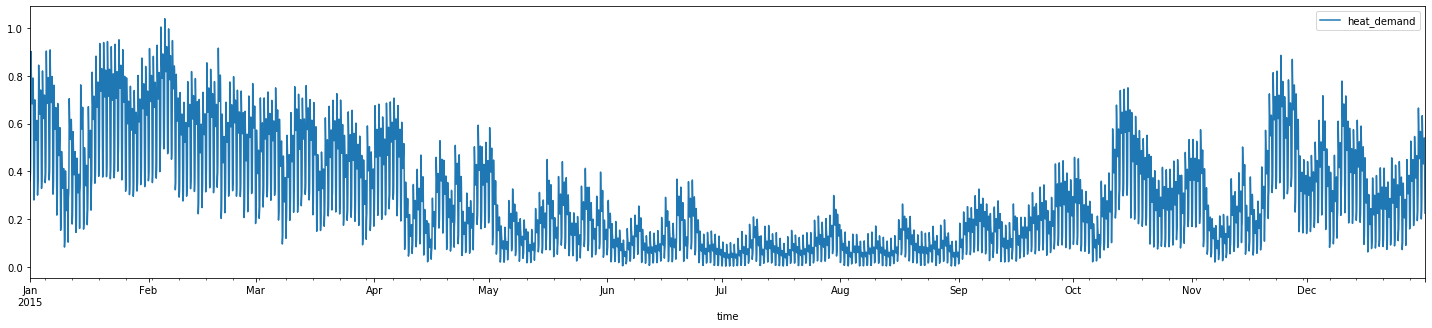

In [28]:
from model.VPPHeatPump import VPPHeatPump

#Values for user_profile
yearly_heat_demand = 2500 # kWh
building_type = 'DE_HEF33'
t_0 = 40 # °C

user_profile.yearly_heat_demand=yearly_heat_demand
user_profile.building_type = building_type
user_profile.t_0=t_0

user_profile.get_heat_demand()
user_profile.heat_demand.plot(figsize=(25,5))

In [29]:
#Values for Heatpump
el_power = 5 #kW electric
heat_sys_temp=60
rampUpTime = 1/15 #timesteps
rampDownTime = 1/15 #timesteps
min_runtime = 1 #timesteps
min_stop_time = 2 #timesteps

hp = VPPHeatPump(identifier=(identifier+'_hp'), 
                 environment=environment, user_profile = user_profile,
                 el_power = el_power, rampUpTime = rampUpTime, 
                 rampDownTime = rampDownTime, 
                 min_runtime = min_runtime, 
                 min_stop_time = min_stop_time)

In [30]:
%%capture
hp.prepareTimeSeries()

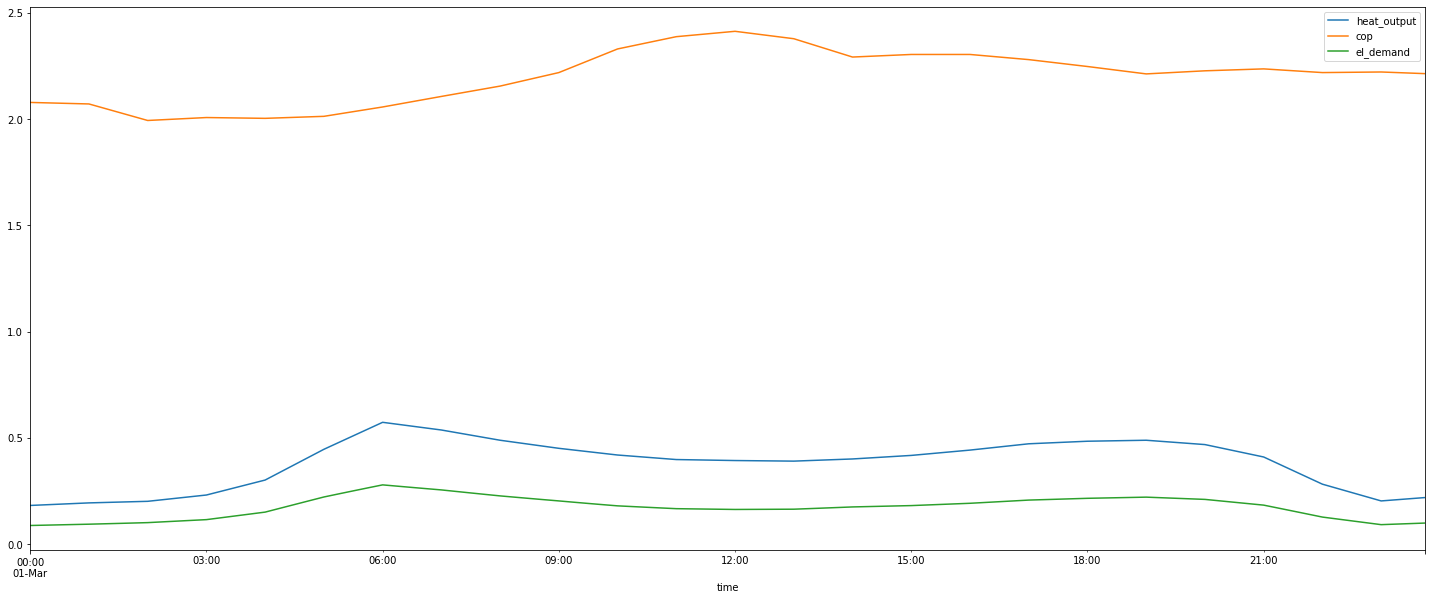

In [32]:
hp.timeseries.plot(figsize=(25,10))

# Home Storage

In [33]:
from model.VPPEnergyStorage import VPPEnergyStorage

#storage
charge_efficiency_hs = 0.98
discharge_efficiency_hs = 0.98
max_power = 4 #kW
capacity = 4 #kWh
max_c = 1 #factor between 0.5 and 1.2

In [34]:
storage = VPPEnergyStorage(unit = unit, identifier=(identifier+'_storage'), 
                           environment = environment, 
                           user_profile = user_profile, 
                           capacity=capacity, 
                           charge_efficiency=charge_efficiency_hs, 
                           discharge_efficiency=discharge_efficiency_hs, 
                           max_power=max_power, max_c=max_c)

# Home Storage

In [35]:
# get baseload
baseload = pd.read_csv("./input/baseload/df_S_15min.csv")
baseload.drop(columns=["Time"], inplace=True)
baseload.set_index(environment.pv_data.index, inplace = True)
baseload.index = pd.to_datetime(baseload.index)

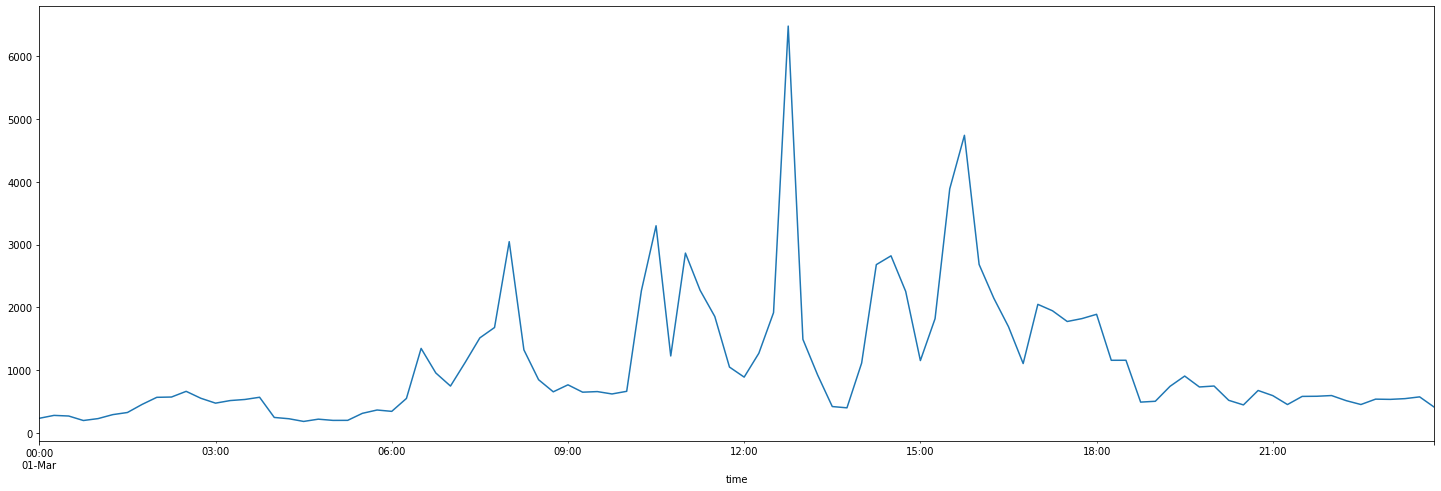

In [37]:
baseload[start:end]['1'].plot(figsize=(25,8))

# Home Storage
### combine pv and baseload timeseries to get the residual load

In [38]:
storage.residual_load = baseload['1'].loc[start:end]/1000 - pv.timeseries.CIRE_pv

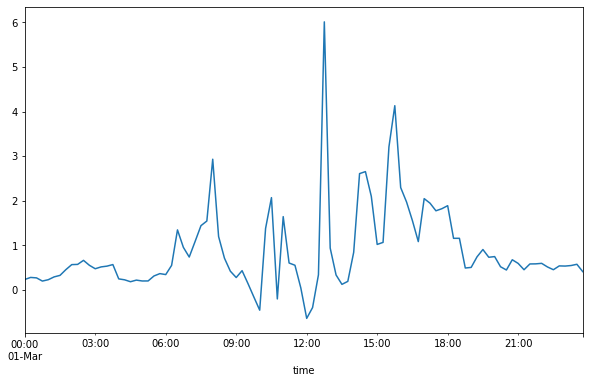

In [39]:
storage.residual_load.plot(figsize=figsize)

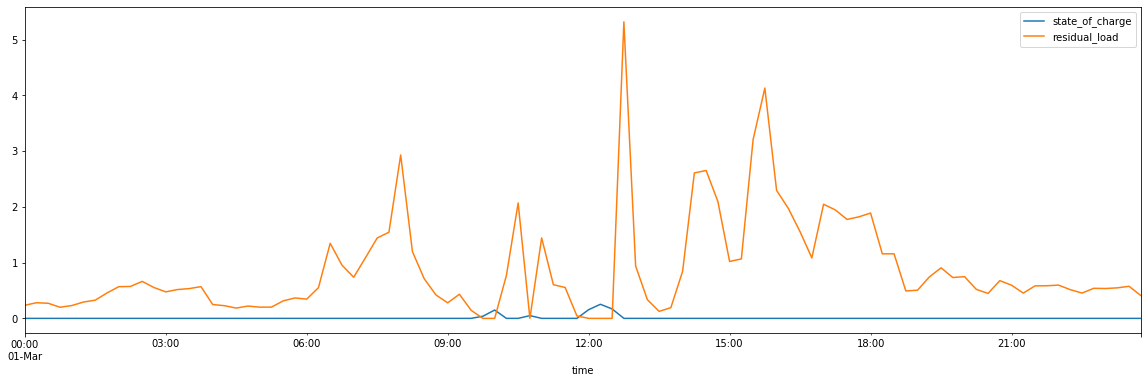

In [42]:
storage.prepareTimeSeries()

storage.timeseries.plot(figsize=(20,6))

![house_model](./presentation/House.png)

![house_w_therm_storage](./presentation/House_thermal.png)

## Add a thermal storage

In [45]:
%%capture
from model.VPPThermalEnergyStorage import VPPThermalEnergyStorage
import pandas as pd

#Values for Thermal Storage
target_temperature = 60 # °C
hysteresis = 5 # °K
mass_of_storage = 500 # kg    
  
tes = VPPThermalEnergyStorage(environment=environment, user_profile=user_profile,
                              mass=mass_of_storage, 
                              hysteresis=hysteresis, 
                              target_temperature=target_temperature)

hp.resetTimeSeries()

# Operate the Storage with a given heat generator

<b>Formula:</b> E = m * cp * T
--> T = E / (m * cp)

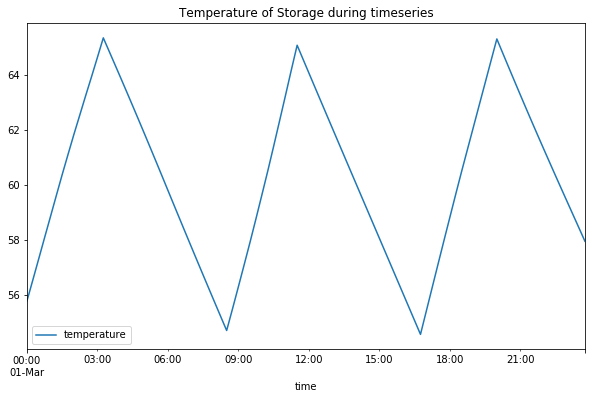

In [46]:
for i in tes.user_profile.heat_demand.loc[start:end].index:
    tes.operate_storage(i, hp)

tes.timeseries.dropna(inplace=True)

tes.timeseries.plot(figsize = figsize, title = "Temperature of Storage during timeseries")

## Plot timeseries for heat pump with thermal storage

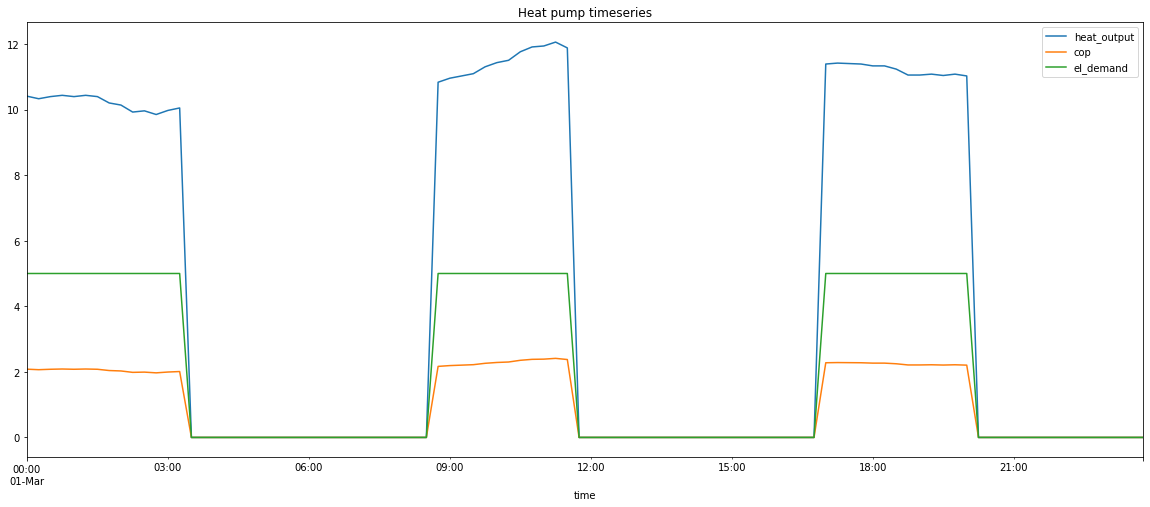

In [48]:
hp.timeseries.plot(figsize = (20,8), title = "Heat pump timeseries")

# Windpowerlib

* library that provides a set of functions and classes to calculate the power output of wind turbines
+ contains data for for various wind turbines

In [51]:
from windpowerlib import wind_turbine as wt
df = wt.get_turbine_types()

       manufacturer  turbine_type  has_power_curve  has_cp_curve
0       Adwen/Areva    AD116/5000             True         False
1           Enercon    E-101/3050             True          True
2           Enercon    E-101/3500             True          True
3           Enercon    E-115/3000             True          True
4           Enercon    E-115/3200             True          True
5           Enercon    E-126/4200             True          True
6           Enercon    E-126/7500             True         False
7           Enercon    E-126/7580             True         False
8           Enercon    E-141/4200             True          True
9           Enercon      E-53/800             True          True
10          Enercon     E-70/2000             True         False
11          Enercon     E-70/2300             True          True
12          Enercon     E-82/2000             True          True
13          Enercon     E-82/2300             True          True
14          Enercon     E

In [52]:
# find all Enercons
print(df[df["manufacturer"].str.contains("Enercon")])

   manufacturer turbine_type  has_power_curve  has_cp_curve
1       Enercon   E-101/3050             True          True
2       Enercon   E-101/3500             True          True
3       Enercon   E-115/3000             True          True
4       Enercon   E-115/3200             True          True
5       Enercon   E-126/4200             True          True
6       Enercon   E-126/7500             True         False
7       Enercon   E-126/7580             True         False
8       Enercon   E-141/4200             True          True
9       Enercon     E-53/800             True          True
10      Enercon    E-70/2000             True         False
11      Enercon    E-70/2300             True          True
12      Enercon    E-82/2000             True          True
13      Enercon    E-82/2300             True          True
14      Enercon    E-82/2350             True          True
15      Enercon    E-82/3000             True          True
16      Enercon    E-92/2350            

# Windpowerlib inside VPPlib

In [53]:
%%capture
from model.VPPWind import VPPWind

environment.get_wind_data(file="./input/wind/dwd_wind_data_2015.csv", 
                          utc=False)

In [54]:
#WindTurbine data
turbine_type = 'E-126/4200'
hub_height = 135
rotor_diameter = 127
fetch_curve = 'power_curve'
data_source = 'oedb'

#ModelChain data
wind_speed_model = 'logarithmic'
density_model = 'ideal_gas'
temperature_model = 'linear_gradient'
power_output_model = 'power_coefficient_curve'#'power_curve'
density_correction = True
obstacle_height = 0
hellman_exp = None

## Windpowerlib inside VPPlib - get wind turbine

In [55]:
wind = VPPWind(unit=unit, identifier=(identifier+'_wind'), 
                 environment = environment, user_profile=user_profile,
                 turbine_type = turbine_type, hub_height = hub_height,
                 rotor_diameter = rotor_diameter, fetch_curve = fetch_curve,
                 data_source = data_source,
                 wind_speed_model = wind_speed_model, 
                 density_model = density_model,
                 temperature_model = temperature_model, 
                 power_output_model = power_output_model, 
                 density_correction = density_correction,
                 obstacle_height = obstacle_height, hellman_exp = hellman_exp)

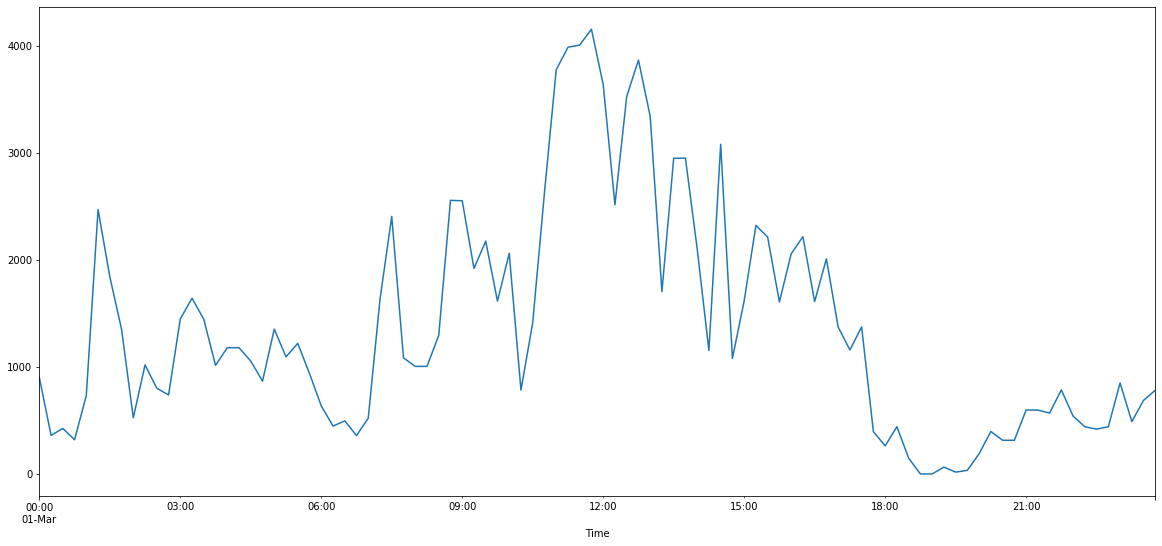

In [57]:
wind.prepareTimeSeries()
wind.timeseries.plot(figsize=(20,9))

![house_w_wind](./presentation/house_w_wind.png)

![grid](./presentation/grid.png)

# Pandapower
* open source tool for power system analysis
+ contains ready to use electrical grids
+ contains switches among other network elements

+ capable of:
    + powerflow and ac optimal powerflow
    + short circuit calculations
    + state estimation
    + topology search

In [58]:
from IPython.display import IFrame
IFrame('https://pandapower.readthedocs.io/en/v2.1.0/networks.html', width='100%', height=700)

# Simulations with VPPlib

In [60]:
# Virtual Power Plant to aggregate all energy devices
from model.VirtualPowerPlant import VirtualPowerPlant
vpp = VirtualPowerPlant("Master_VPP")

In [61]:
import pandapower as pp
import pandapower.networks as pn

# choosa a grid in which the vpp will be running
net = pn.panda_four_load_branch()

# do some initialization for later p and q assignment of loads
for bus in net.bus.index:
    
    net.load.name[net.load.bus == bus] = net.bus.name[bus]+'_baseload'
    net.load.type[net.load.bus == bus] = 'baseload'

print(net)

This pandapower network includes the following parameter tables:
   - bus (6 elements)
   - load (4 elements)
   - ext_grid (1 element)
   - line (4 elements)
   - trafo (1 element)
   - bus_geodata (6 elements)


In [62]:
import pandas as pd
from model.VirtualPowerPlant import VirtualPowerPlant

#environment
start = '2015-03-01 00:00:00'
end = '2015-03-01 23:45:00'
timezone = 'Europe/Berlin'
year = '2015'
time_freq = "15 min"
timebase=15
index=pd.date_range(start=start, end=end, freq=time_freq)
temp_days_file = "./input/thermal/dwd_temp_days_2015.csv"
temp_hours_file = "./input/thermal/dwd_temp_hours_2015.csv"

#user_profile
identifier = "bus_1"
latitude = 50.941357
longitude = 6.958307
yearly_heat_demand = 12500
comfort_factor=None
daily_vehicle_usage=None
building_type = 'DE_HEF33'
t_0 = 40
week_trip_start=[]
week_trip_end=[]
weekend_trip_start=[]
weekend_trip_end=[]

baseload = pd.read_csv("./input/baseload/df_S_15min.csv")
baseload.drop(columns=["Time"], inplace=True)
baseload.index =  pd.date_range(start=year, periods = 35040, freq=time_freq, name ='time')

unit = "kW"

#WindTurbine data
turbine_type = 'E-126/4200'
hub_height = 135
rotor_diameter = 127
fetch_curve = 'power_curve'
data_source = 'oedb'

#Wind ModelChain data
wind_file = "./input/wind/dwd_wind_data_2015.csv"
wind_speed_model = 'logarithmic'
density_model = 'ideal_gas'
temperature_model = 'linear_gradient'
power_output_model = 'power_curve'
density_correction = True
obstacle_height = 0
hellman_exp = None

#PV data
pv_file = "./input/pv/dwd_pv_data_2015.csv"
module_lib = 'SandiaMod'
module = 'Canadian_Solar_CS5P_220M___2009_'
inverter_lib = 'cecinverter'
inverter = 'ABB__PVI_4_2_OUTD_S_US_Z_M_A__208_V__208V__CEC_2014_'
surface_tilt = 20, 
surface_azimuth = 200
modules_per_string = 4
strings_per_inverter = 2

#BEV data
battery_max = 16
battery_min = 0
battery_usage = 1
charging_power = 11
charge_efficiency_bev = 0.98

#heat pump data
heatpump_type="Air"
heat_sys_temp=60
el_power=5
building_type = 'DE_HEF33'

#storage
charge_efficiency_storage = 0.98
discharge_efficiency_storage = 0.98
max_power = 4 #kW
capacity = 4 #kWh
max_c = 1 #factor between 0.5 and 1.2


In [63]:
%%capture
# environment

environment = VPPEnvironment(timebase=timebase, timezone=timezone, 
                             start=start, end=end, year=year,
                             time_freq=time_freq)

environment.get_wind_data(file=wind_file, utc=False)
environment.get_pv_data(file=pv_file)
environment.get_mean_temp_days(file=temp_days_file)
environment.get_mean_temp_hours(file=temp_hours_file)

#%% user profile

user_profile = VPPUserProfile(identifier=identifier,
                     latitude=latitude,
                     longitude=longitude,
                     yearly_heat_demand=yearly_heat_demand,
                     building_type=building_type,
                     comfort_factor=comfort_factor,
                     t_0=t_0,
                     daily_vehicle_usage=daily_vehicle_usage,
                     week_trip_start=week_trip_start, 
                     week_trip_end=week_trip_end,
                     weekend_trip_start=weekend_trip_start, 
                     weekend_trip_end=weekend_trip_end)

user_profile.get_heat_demand()

In [64]:
# create instance of VirtualPowerPlant and the designated grid
vpp = VirtualPowerPlant("Master")

net = pn.panda_four_load_branch()

# assign names and types to baseloads for later p and q assignment
for bus in net.bus.index:
    
    net.load.name[net.load.bus == bus] = net.bus.name[bus]+'_baseload'
    net.load.type[net.load.bus == bus] = 'baseload'

In [65]:
# choose busses for the components in the grid (can be done automatically)
vpp.buses_with_pv = ['bus3', 'bus4', 'bus5', 'bus6']
vpp.buses_with_hp = ['bus4']
vpp.buses_with_bev = ['bus5']
vpp.buses_with_storage = ['bus5']
vpp.buses_with_wind = ['bus1']

In [66]:
# create components and assign components to the Virtual Powerplant

for bus in vpp.buses_with_pv:
    
    vpp.addComponent(VPPPhotovoltaic(unit=unit, identifier=(bus+'_PV'),  
                                     environment = environment, 
                                     user_profile = user_profile,
                                     module_lib = module_lib, 
                                     module = module, 
                                     inverter_lib = inverter_lib, 
                                     inverter = inverter,
                                     surface_tilt = surface_tilt, 
                                     surface_azimuth = surface_azimuth,
                                     modules_per_string = modules_per_string, 
                                     strings_per_inverter = strings_per_inverter))
    
    vpp.components[list(vpp.components.keys())[-1]].prepareTimeSeries()
    
    
for bus in vpp.buses_with_storage:
    
    vpp.addComponent(VPPEnergyStorage(unit=unit, 
                                      identifier=(bus+'_storage'), 
                                      environment=environment, 
                                      user_profile=user_profile, 
                                      capacity=capacity, 
                                      charge_efficiency=charge_efficiency_storage, 
                                      discharge_efficiency=discharge_efficiency_storage, 
                                      max_power=max_power, max_c=max_c))
    
    vpp.components[
            list(vpp.components.keys())[-1]].timeseries = pd.DataFrame(
            columns=['state_of_charge','residual_load'], 
            index=pd.date_range(start=start, end=end, freq=time_freq))
    
    
for bus in vpp.buses_with_bev:
    
    vpp.addComponent(VPPBEV(unit=unit, identifier=(bus+'_BEV'), 
                            environment=environment, user_profile=user_profile, 
                            battery_max=battery_max, battery_min=battery_min, 
                            battery_usage=battery_usage, 
                            charging_power=charging_power, 
                            charge_efficiency=charge_efficiency_bev))
    
    vpp.components[list(vpp.components.keys())[-1]].prepareTimeSeries()
    
    
for bus in vpp.buses_with_hp:
    
    vpp.addComponent(VPPHeatPump(unit=unit,identifier=(bus+'_HP'),  
                                 environment=environment, 
                                 user_profile=user_profile,
                                 heatpump_type=heatpump_type, 
                                 heat_sys_temp=heat_sys_temp, 
                                 el_power=el_power))
    
    vpp.components[list(vpp.components.keys())[-1]].prepareTimeSeries()
    
for bus in vpp.buses_with_wind:
    
    vpp.addComponent(VPPWind(unit=unit, identifier = (bus+'_Wind'), 
                 environment=environment, user_profile=user_profile,
                 turbine_type=turbine_type, hub_height=hub_height,
                 rotor_diameter=rotor_diameter, fetch_curve=fetch_curve,
                 data_source=data_source,
                 wind_speed_model=wind_speed_model, 
                 density_model=density_model,
                 temperature_model=temperature_model, 
                 power_output_model=power_output_model, 
                 density_correction=density_correction,
                 obstacle_height=obstacle_height, 
                 hellman_exp=hellman_exp))
    
    vpp.components[list(vpp.components.keys())[-1]].prepareTimeSeries()

In [67]:
# create elements in the pandapower.net

for bus in vpp.buses_with_pv:
    
    pp.create_sgen(net, bus=net.bus[net.bus.name == bus].index[0], 
                  p_mw=(vpp.components[bus+'_PV'].module.Impo*vpp.components[bus+'_PV'].module.Vmpo/1000000),
                  name=(bus+'_PV'), type = 'PV')    

for bus in vpp.buses_with_storage:
    
    pp.create_storage(net, bus=net.bus[net.bus.name == bus].index[0],
                      p_mw=0, max_e_mwh=capacity, name=(bus+'_storage'), type='LiIon')
  
for bus in vpp.buses_with_bev:
    
    pp.create_load(net, bus=net.bus[net.bus.name == bus].index[0], 
                   p_mw=(vpp.components[bus+'_BEV'].charging_power/1000), name=(bus+'_BEV'), type='BEV')
    
for bus in vpp.buses_with_hp:
    
    pp.create_load(net, bus=net.bus[net.bus.name == bus].index[0], 
                   p_mw=(vpp.components[bus+'_HP'].el_power/1000), name=(bus+'_HP'), type='HP')
    
for bus in vpp.buses_with_wind:
    
    pp.create_sgen(net, bus=net.bus[net.bus.name == bus].index[0], 
                  p_mw=(vpp.components[bus+'_Wind'].wind_turbine.nominal_power/1000000),
                  name=(bus+'_Wind'), type = 'Wind')
  

## VPPlib - operator class
* used to define operation strategies for a virtual power plant and the corresponding grid

In [68]:
from model.VPPOperator import VPPOperator

# initialize operator

operator = VPPOperator(virtualPowerPlant=vpp, net=net, targetData=None)

In [69]:
# run base_scenario without operation strategies

net_dict = operator.run_base_scenario(baseload)    

In [70]:
# extract results from powerflow

results = operator.extract_results(net_dict)

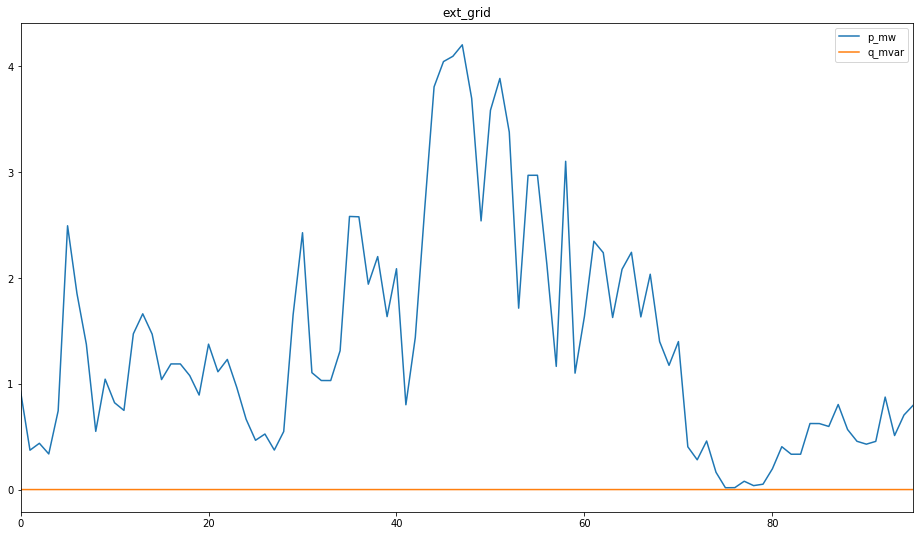

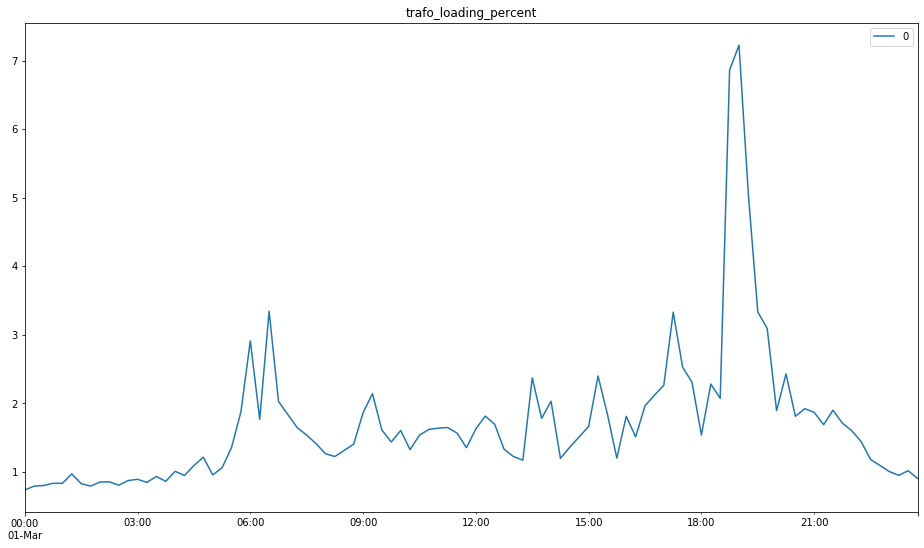

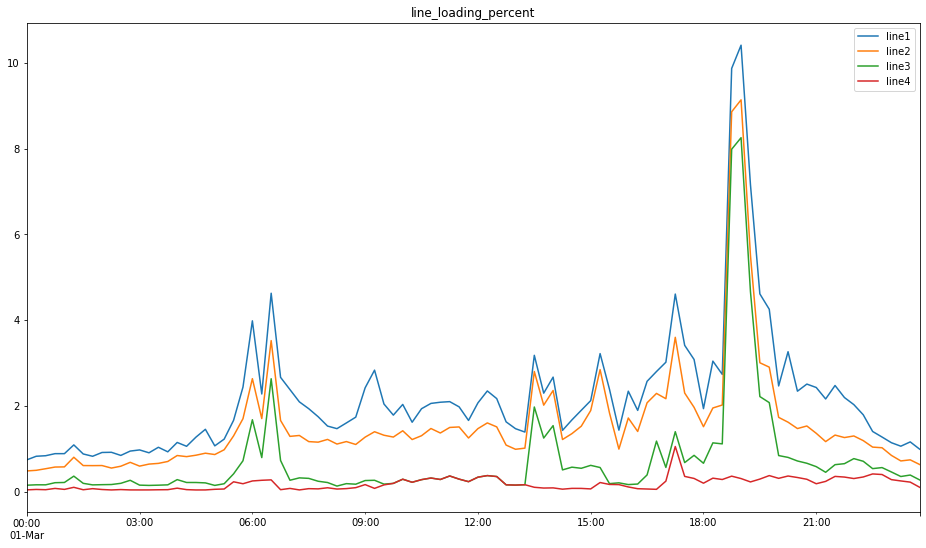

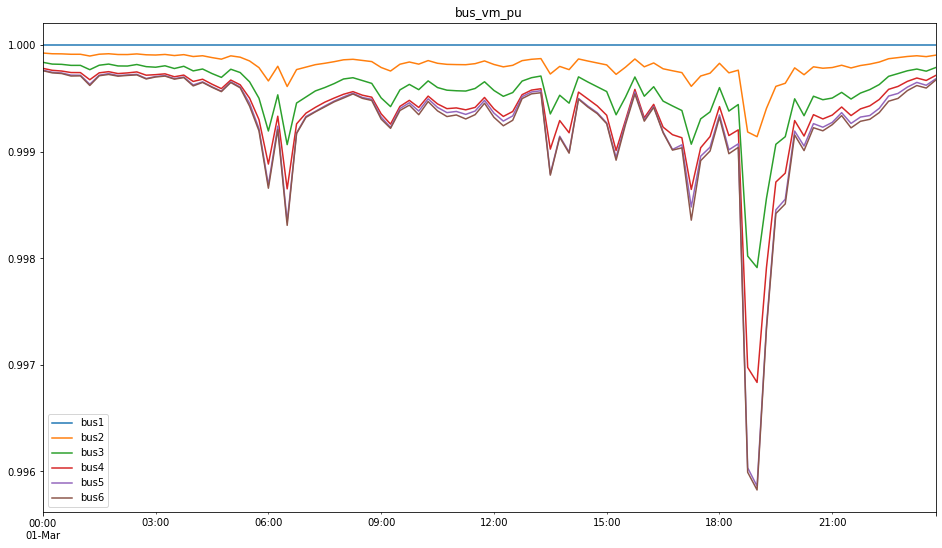

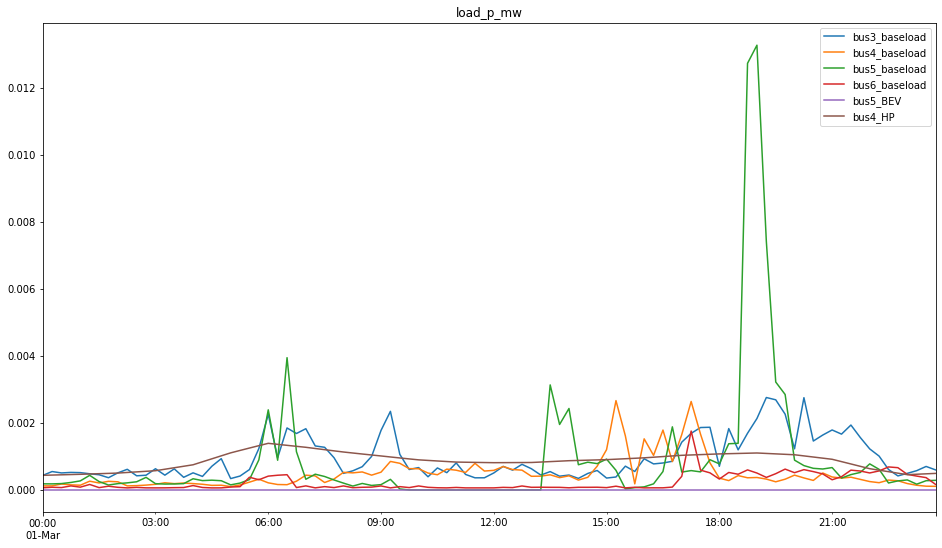

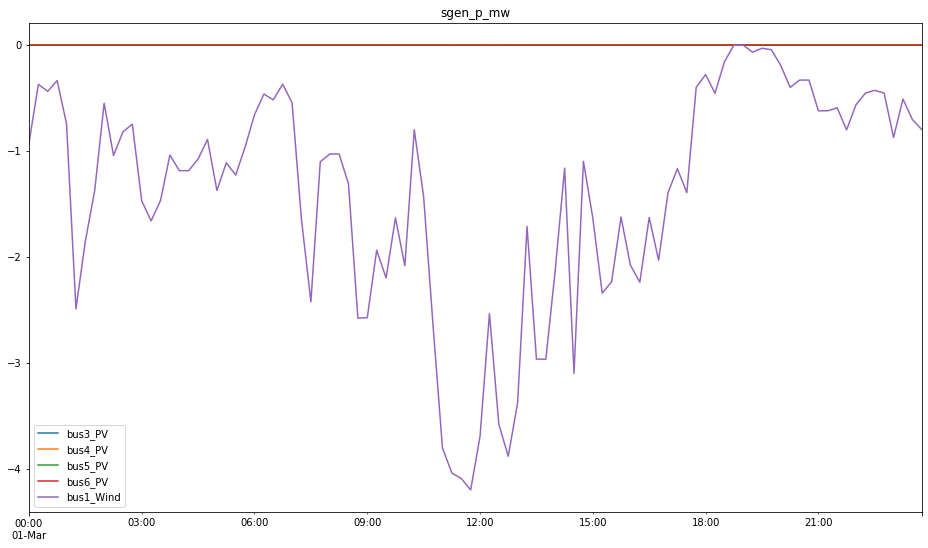

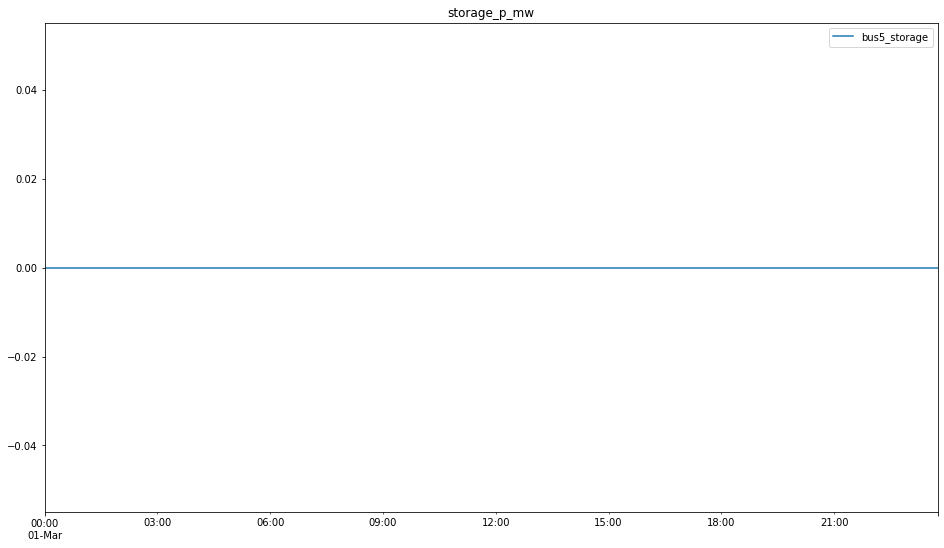

In [71]:
# plot results of powerflow

operator.plot_results(results)

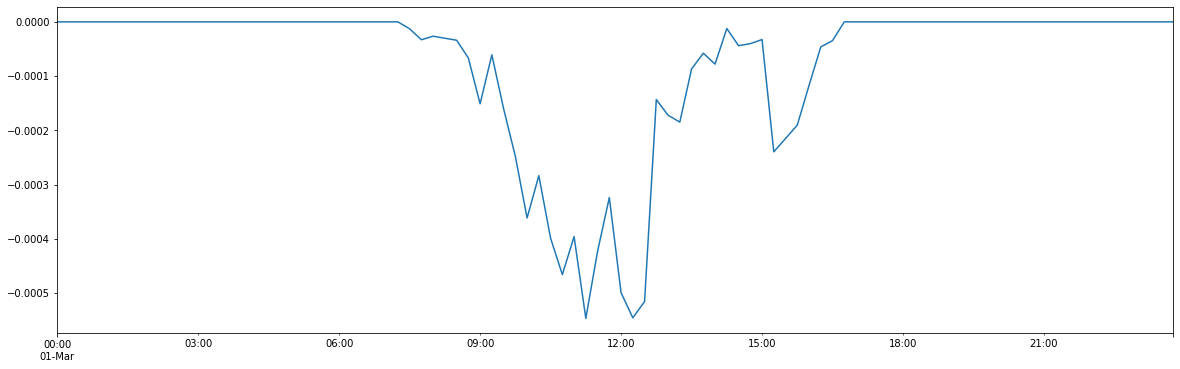

In [72]:
results['sgen_p_mw']['bus3_PV'].plot(figsize=(20,6))

# Thank you for your attention

# Resources

1. William F. Holmgren, Clifford W. Hansen, and Mark A. Mikofski. “pvlib python: a python package for modeling solar energy systems.” Journal of Open Source Software, 3(29), 884, (2018). https://doi.org/10.21105/joss.00884 

2.  Sabine Haas, Birgit Schachler, Uwe Krien, & Stephen Bosch. (2019, September 9). wind-python/windpowerlib: Revision release (Version v0.2.0). Zenodo. http://doi.org/10.5281/zenodo.3403360 

2. L. Thurner, A. Scheidler, F. Schäfer et al, pandapower - an Open Source Python Tool for Convenient Modeling, Analysis and Optimization of Electric Power Systems, in IEEE Transactions on Power Systems, vol. 33, no. 6, pp. 6510-6521, Nov. 2018.